In [10]:
import torch as th
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [11]:
training_data = datasets.FashionMNIST(
    root="./data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="./data",
    train=False,
    download=True,
    transform=ToTensor()
)

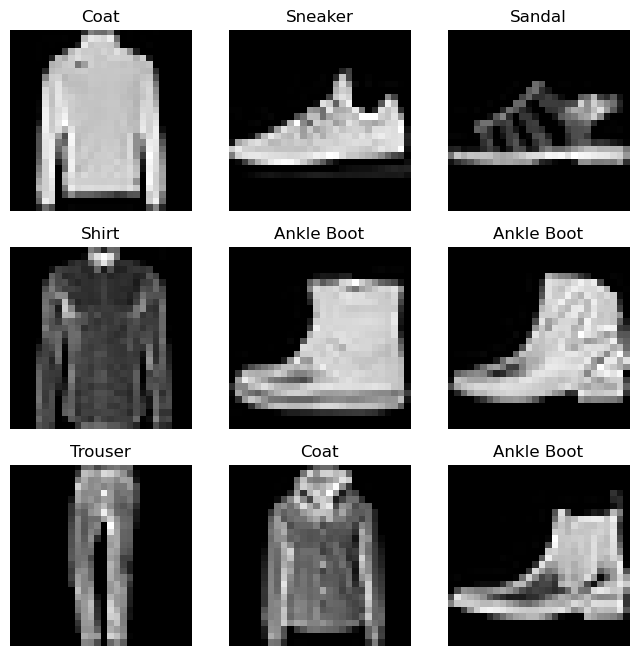

In [12]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = th.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [13]:
device = "mps"
dtype = th.float32

In [14]:
# Convolutional Neural Network
model = th.nn.Sequential(
    th.nn.Conv2d(1, 64, kernel_size=3),
    th.nn.ReLU(),
    th.nn.MaxPool2d(2),
    th.nn.Conv2d(64, 64, kernel_size=3),
    th.nn.ReLU(),
    th.nn.MaxPool2d(2),
    th.nn.Flatten(),
    th.nn.Linear(64 * 5 * 5, 64),
    th.nn.ReLU(),
    th.nn.Linear(64, 10),
).to(device=device, dtype=dtype)

In [15]:
from tqdm.notebook import trange

In [16]:
optimizer = th.optim.Adam(model.parameters(), lr=1e-5)

steps = 100
logging_steps = 5

train_it = th.utils.data.DataLoader(training_data, batch_size=256, shuffle=True)

for step in trange(steps):
    for data, target in train_it:
        data, target = data.to(device=device, dtype=dtype), target.to(device=device, dtype=th.int64)
        optimizer.zero_grad()
        output = model(data)
        loss = th.nn.functional.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
    if step % logging_steps == logging_steps - 1:
        print(f"Step {step}, Loss {loss.item()}")

  0%|          | 0/100 [00:00<?, ?it/s]

Step 4, Loss 0.9291510581970215
Step 9, Loss 0.5676193833351135
Step 14, Loss 0.5727132558822632
Step 19, Loss 0.6122647523880005
Step 24, Loss 0.6104339957237244
Step 29, Loss 0.33925822377204895
Step 34, Loss 0.44847333431243896
Step 39, Loss 0.3687960207462311
Step 44, Loss 0.5051957964897156
Step 49, Loss 0.47225359082221985
Step 54, Loss 0.3728525638580322
Step 59, Loss 0.4187985956668854
Step 64, Loss 0.45816466212272644
Step 69, Loss 0.4275977611541748
Step 74, Loss 0.3267073929309845
Step 79, Loss 0.5709762573242188
Step 84, Loss 0.406040757894516
Step 89, Loss 0.33275309205055237
Step 94, Loss 0.4411725103855133
Step 99, Loss 0.3139331042766571


In [17]:
correct = 0
total = 0

for data, target in th.utils.data.DataLoader(test_data, batch_size=64):
    data, target = data.to(device=device, dtype=dtype), target.to(device=device, dtype=th.int64)
    output = model(data)
    _, predicted = th.max(output, 1)
    total += target.size(0)
    correct += (predicted == target).sum()